# 5. filters

In [1]:
import numpy as np
from skimage.io import imread, imshow
from skimage.color import rgb2gray, rgb2yuv, yuv2rgb
from skimage import filters
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from skimage import data
%matplotlib inline

D:\Anaconda\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


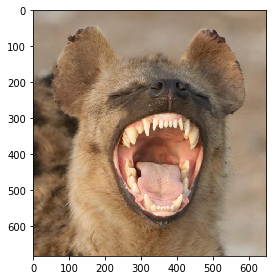

In [2]:
img=imread('https://avatars.mds.yandex.net/get-zen_doc/99845/pub_5b26c5bff456e000a9d8ac16_5b26d0135a1a0800a8541aa0/scale_1200')
# img=imread('https://www.bornfree.org.uk/storage/images/small/5acb4aa4291576.84793136.jpeg')
# img = data.astronaut()
imshow(img)
plt.show()

In [3]:
img2 = rgb2gray(img)

In [4]:
#для построения графиков
def plot2(img1, img2, title1, title2):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4),
                                    sharex=True, sharey=True)
    ax1.imshow(img1, cmap=plt.cm.gray)
    ax1.axis('off')
    ax1.set_title(title1)

    ax2.imshow(img2, cmap=plt.cm.gray)
    ax2.axis('off')
    ax2.set_title(title2)

    fig.tight_layout()

    plt.show()

In [5]:
#для построения графиков
def plot3(img1, img2, img3, title1, title2, title3):
    fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12, 4),
                                    sharex=True, sharey=True)
    ax1.imshow(img1, cmap=plt.cm.gray)
    ax1.axis('off')
    ax1.set_title(title1)

    ax2.imshow(img2, cmap=plt.cm.gray)
    ax2.axis('off')
    ax2.set_title(title2)

    ax3.imshow(img3, cmap=plt.cm.gray)
    ax3.axis('off')
    ax3.set_title(title3)

    fig.tight_layout()

    plt.show()

In [6]:
#для построения графиков
def plot4(img1, img2, img3, img4, title1, title2, title3, title4):
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(14, 4),
                                    sharex=True, sharey=True)
    ax1.imshow(img1, cmap=plt.cm.gray)
    ax1.axis('off')
    ax1.set_title(title1)

    ax2.imshow(img2, cmap=plt.cm.gray)
    ax2.axis('off')
    ax2.set_title(title2)

    ax3.imshow(img3, cmap=plt.cm.gray)
    ax3.axis('off')
    ax3.set_title(title3)
    
    ax4.imshow(img4, cmap=plt.cm.gray)
    ax4.axis('off')
    ax4.set_title(title4)

    fig.tight_layout()

    plt.show()

## 5.1. edge detection (выделение границ)
### 5.1.1. Стандартный фильтр для выделения скачков яркости
Стандартный фильтр для выделения скачков яркости (выделения границ, edge
detection) использует разностную аппроксимацию первых производных к яркости исходного
изображения и использует следующие матрицы в качестве ядра свертки:

In [7]:
kernel_Dx = np.array([[0, 0, 0], 
                     [-1, 0, 1], 
                     [0, 0, 0]])

kernel_Dy = np.array([[0, 1, 0], 
                     [0, 0, 0], 
                     [0, -1, 0]])

In [8]:
res_Dx = convolve2d(img2, kernel_Dx, mode = "valid")
res_Dy = convolve2d(img2, kernel_Dy, mode = "valid")

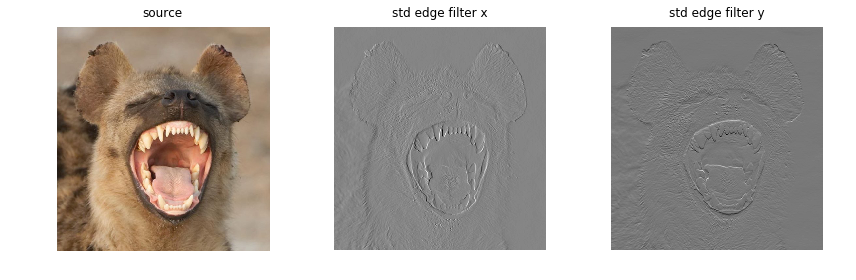

In [9]:
plot3(img, res_Dx, res_Dy, 'source', 'std edge filter x', 'std edge filter y')

### 5.1.2. Фильтр Превитта
Чуть более сложным является фильтр Превитта, использующий следующие
матрицы в качестве ядра свертки:

In [10]:
kernel_Px = np.array([[-1, 0, 1], 
                     [-1, 0, 1], 
                     [-1, 0, 1]])

kernel_Py = np.array([[-1, -1, -1], 
                     [0, 0, 0], 
                     [1, 1, 1]])

In [11]:
res_Px = convolve2d(img2, kernel_Px, mode = "valid")
res_Py = convolve2d(img2, kernel_Py, mode = "valid")

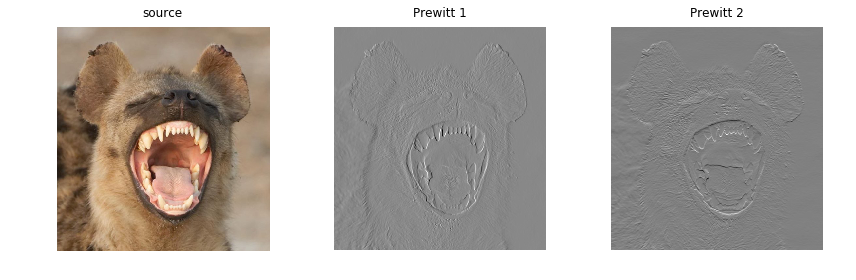

In [12]:
plot3(img, res_Px, res_Py, 'source', 'Prewitt 1', 'Prewitt 2')

### 5.1.3. Фильтр Собеля

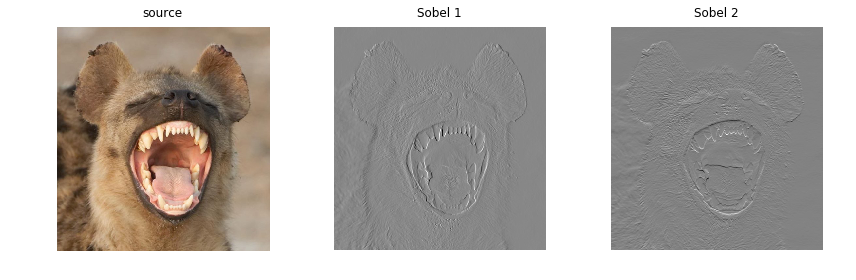

In [13]:
#right Sobel
kernel_Sx = np.array([[-1, 0, 1], 
                     [-2, 0, 2], 
                     [-1, 0, 1]])
#bottom Sobel
kernel_Sy = np.array([[-1, -2, -1], 
                     [0, 0, 0], 
                     [1, 2, 1]])
res_Sx = convolve2d(img2, kernel_Sx, mode = "valid")
res_Sy = convolve2d(img2, kernel_Sy, mode = "valid")
plot3(img, res_Sx, res_Sy, 'source', 'Sobel 1', 'Sobel 2')

### 5.1.4. Discrete Laplace operator
Разностный аналог лапласиана.

In [14]:
kernel_L1 = np.array([[0, 1, 0], 
                     [1, -4, 1], 
                     [0, 1, 0]])

kernel_L2 = np.array([[1, 1, 1], 
                     [1, -8, 1], 
                     [1, 1, 1]])

In [15]:
res_L1 = convolve2d(img2, kernel_L1, mode = "valid")
res_L2 = convolve2d(img2, kernel_L2, mode = "valid")

#### skimage

In [16]:
res_SL = filters.laplace(img2, ksize = 3)

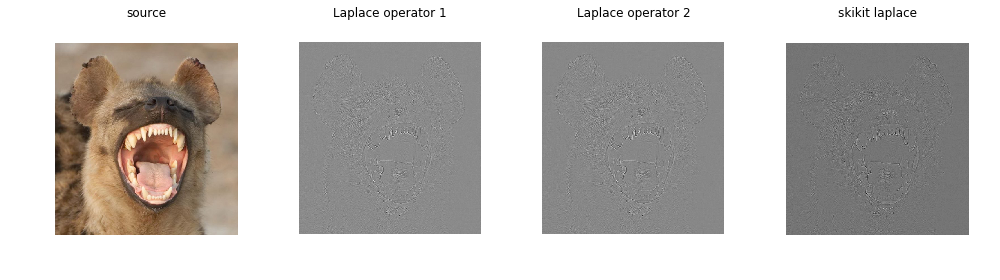

In [17]:
plot4(img, res_L1, res_L2, res_SL, 'source', 'Laplace operator 1', 'Laplace operator 2', 'skikit laplace')

## 5.2. Другие фильтры
### 5.2.1. emboss 
фильтр тиснения

In [18]:
kernel_E1 = np.array([[-2, 0, 0], 
                     [0, 1, 0], 
                     [0, 0, 2]])

kernel_E2 = np.array([[-2, -1, 0], 
                     [-1, 1, 1], 
                     [0, 1, 2]])

In [19]:
res_E1 = convolve2d(img2, kernel_E1, mode = "valid")
res_E2 = convolve2d(img2, kernel_E2, mode = "valid")

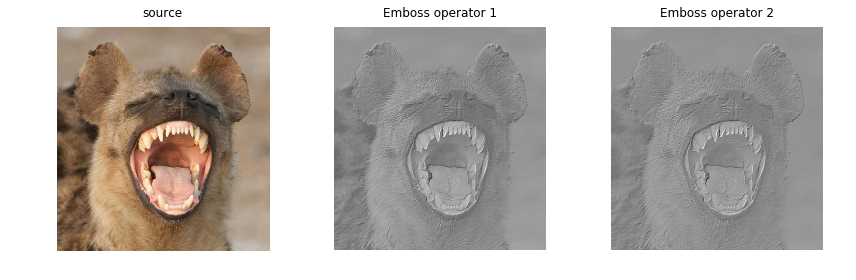

In [20]:
plot3(img, res_E1, res_E2, 'source', 'Emboss operator 1', 'Emboss operator 2')

### 5.2.2 Фильтр повышения контрастности

In [21]:
kernel_hc = np.array([[-1, -1, -1], 
                     [-1, 9, -1], 
                     [-1, -1, -1]])

# outline kernel c 8 вместо 9 выделяет края
# http://setosa.io/ev/image-kernels/

When applying this filter to several color layers independently, color bleeding may occur. More visually pleasing result can be achieved by processing only the brightness/lightness/intensity channel in a suitable color space such as HSV, HSL, YUV, or YCbCr.

In [22]:
def high_contrast(img):
    img = rgb2yuv(img)
    #Y is between 0 and 1
    Y = img[:,:,0]
    U = img[:,:,1]
    V = img[:,:,2]
    
    Y = convolve2d(Y, kernel_hc, mode = "same") # переполнение
    U = convolve2d(U, kernel_hc, mode = "same")
    V = convolve2d(V, kernel_hc, mode = "same")
    #Y = np.clip(Y, 0, 1)
   
    img = np.dstack((Y,U,V))
    
    img = yuv2rgb(img) # переполнение
    
    img = np.clip(img, 0, 1)
    
    return img

In [23]:
res1 = high_contrast(img)
#много шума
res2 = filters.gaussian(img, multichannel=True)
res2 = high_contrast(res2)

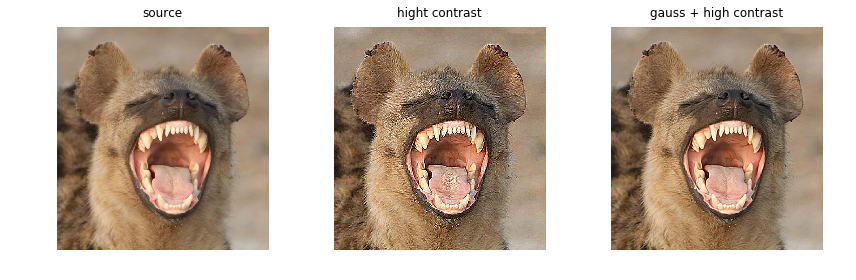

In [24]:
plot3(img, res1, res2, 'source', 'hight contrast','gauss + high contrast')

_Фильтры размытия реализованы в предыдущей лабораторной работе_


# skimage edge detection filters
### sobel

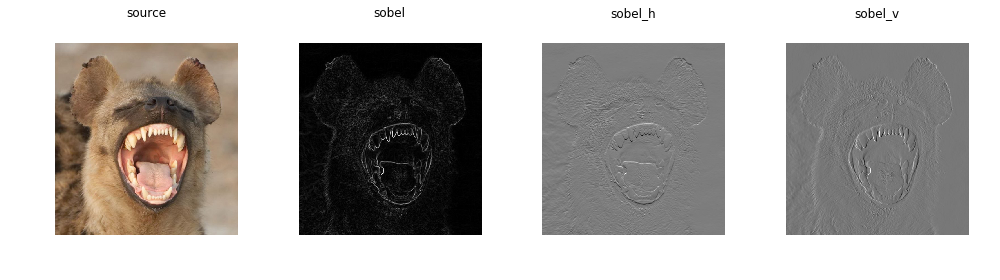

In [25]:
res_SS = filters.sobel(img2) # Find the edge magnitude using the Sobel transform.
res_SSh = filters.sobel_h(img2) # Find the horizontal edges of an image using the Sobel transform.
res_SSv = filters.sobel_v(img2) # Find the vertical edges of an image using the Sobel transform.
plot4(img, res_SS, res_SSh, res_SSv, 'source', 'sobel', 'sobel_h', 'sobel_v')

### scharr

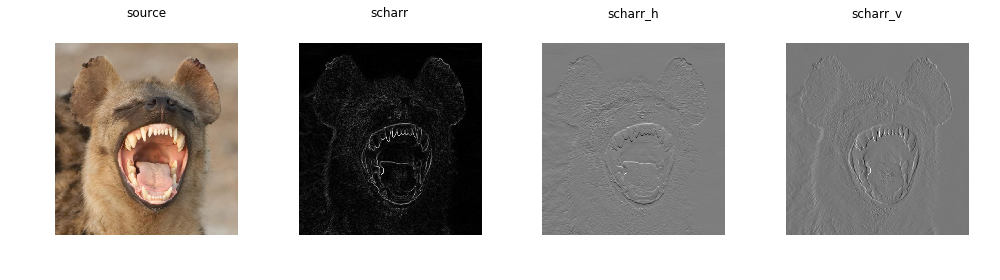

In [26]:
res_SSc = filters.scharr(img2) # Find the edge magnitude using the Scharr transform.
res_SSch = filters.scharr_h(img2) # Find the horizontal edges of an image using the Scharr transform.
res_SScv = filters.scharr_v(img2) # Find the vertical edges of an image using the Scharr transform.
plot4(img, res_SS, res_SSh, res_SSv, 'source', 'scharr', 'scharr_h', 'scharr_v')

### prewitt

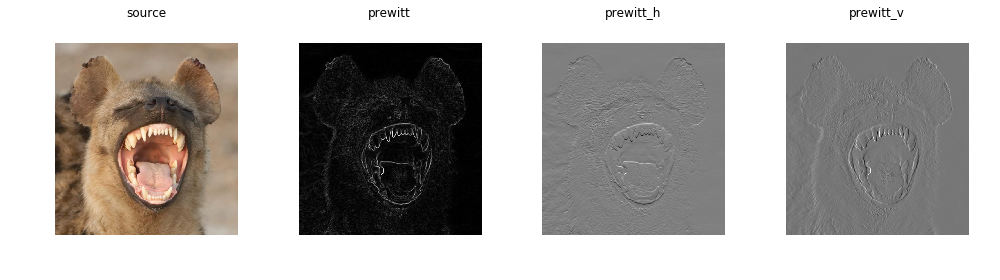

In [27]:
res_SP = filters.prewitt(img2) # Find the edge magnitude using the Prewitt transform.
res_SPh = filters.prewitt_h(img2) # Find the horizontal edges of an image using the Prewitt transform.
res_SPv = filters.prewitt_v(img2) # Find the vertical edges of an image using the Prewitt transform.
plot4(img, res_SP, res_SPh, res_SPv, 'source', 'prewitt', 'prewitt_h', 'prewitt_v')

### roberts

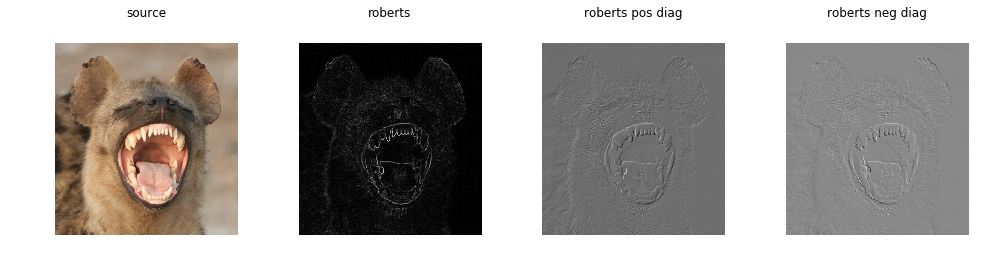

In [28]:
res_SR = filters.roberts(img2) # Find the edge magnitude using Roberts’ cross operator.
res_SRp = filters.roberts_pos_diag(img2) # Find the cross edges of an image using Roberts’ cross operator.
res_SRn = filters.roberts_neg_diag(img2) # Find the cross edges of an image using the Roberts’ Cross operator.
plot4(img, res_SR, res_SRp, res_SRn, 'source', 'roberts', 'roberts pos diag', 'roberts neg diag')